# 4.10 Coding Etiquette & Excel Reporting

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'C:\Users\Brichaelle\01-08-2023 Instacart Basket Analysis' 

In [3]:
ords_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_combined.pkl')) 

## Table of Contents

3 - Regional Flag

3.1 - Regional Line Chart

4 - Low-activity Exclusion Flag

5 - Customer Profile

6 - Customer Profile Bar Chart

7 - Customer Profile Aggregation

8 - Customer Profile Comparisons

8.1 - Regional Customer Profile Line Chart

8.2 - Departmental Customer Profile Line Chart

## 3. Regional Flag

In [4]:
ords_merged.head() 

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,prior,17,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
# Creating Flag

ords_merged.loc[ords_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [6]:
ords_merged.loc[ords_merged['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [7]:
ords_merged.loc[ords_merged['State'].isin(['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Florida']), 'Region'] = 'South'

In [8]:
ords_merged.loc[ords_merged['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [9]:
# Checking variable frequencies

ords_merged['Region'].value_counts(dropna = False) 

South        7764149
West         5975067
Midwest      5466951
Northeast    4128870
Name: Region, dtype: int64

In [10]:
# Creating line chart for comparison
np.random.seed(4)
dev = np.random.rand(len(ords_merged)) <= 0.7 

In [11]:
# Store 70% of sample

big = ords_merged[dev] 

In [12]:
# Store 30% of sample

small = ords_merged[~dev] 

In [13]:
# Using only necessary columns 

a_2 = small[['Region','spending_flag']] 

### 3.1 Regional Line Chart

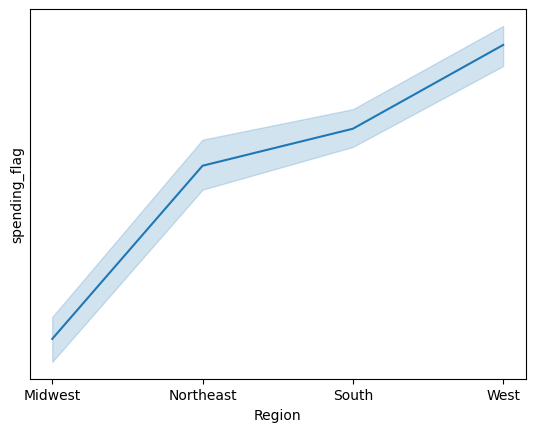

In [14]:
# Creating line chart

line = sns.lineplot(data = a_2, x = 'Region',y = 'spending_flag') 

In [15]:
# Exporting chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_spending.png'))   

## 4. Low-activity Exclusion Flag

In [16]:
# Creating Flag
ords_merged.loc[ords_merged['max_order'] < 5, 'low_activity_flag'] = 'Low-activity Customer'

In [17]:
# Checking variable frequencies

ords_merged['low_activity_flag'].value_counts(dropna = False) 

NaN                      22455232
Low-activity Customer      879805
Name: low_activity_flag, dtype: int64

In [18]:
ords_merged.head() 

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,NaN
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,NaN
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,NaN
3,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,NaN
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,prior,17,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,NaN


In [19]:
# Exporting Sample

ords_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Region_low_activity.pkl')) 

## 5. Customer Profile

In [20]:
# Creating Flag

ords_merged.loc[(ords_merged['Age'] < 30) & (ords_merged['n_dependants'] > 0), 'customer_profile'] = 'young parent' 

In [21]:
ords_merged.loc[(ords_merged['fam_status'] == 'single') & (ords_merged['n_dependants'] == 0), 'customer_profile'] = 'single adult' 

In [22]:
#checking flag frequency

ords_merged['customer_profile'].value_counts(dropna = False) 

NaN             16224624
single adult     3815399
young parent     3295014
Name: customer_profile, dtype: int64

## 6. Customer Profile Bar Chart

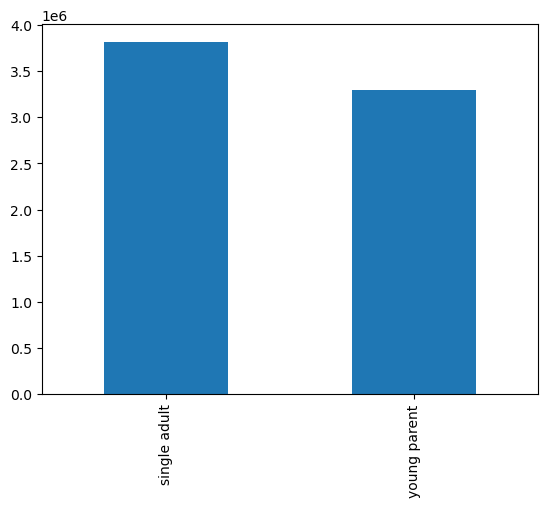

In [23]:
bar = ords_merged['customer_profile'].value_counts(dropna = True).plot.bar()  

In [24]:
# Exporting chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile.png'))  

## 7. Customer Profile Aggregation

In [25]:
ords_merged.groupby('customer_profile').agg({'order_frequency': ['mean', 'min', 'max']}) 

order_frequency           
                            mean  min   max
customer_profile                           
single adult           10.181949  0.0  30.0
young parent           10.114993  0.0  30.0

## 8. Customer Profile Comparisons

In [26]:
# Creating line charts for comparison

np.random.seed(4)
dev = np.random.rand(len(ords_merged)) <= 0.7 

In [27]:
# Store 70% of sample

big = ords_merged[dev] 

In [28]:
# Store 30% of sample

small = ords_merged[~dev] 

In [29]:
# Using only necessary columns 

a_3 = small[['Region','customer_profile']] 

### 8.1 Regional Customer Profile Line Chart

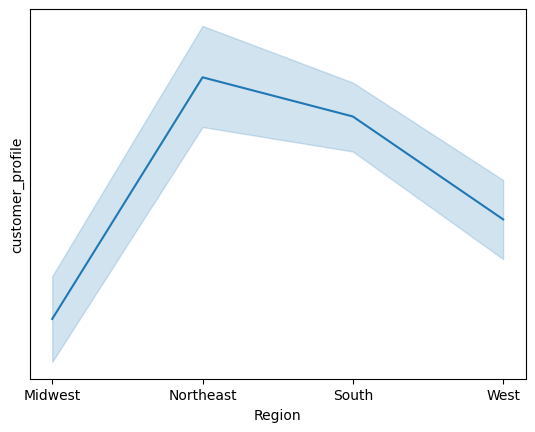

In [30]:
# Creating customer profile by region line chart

line_3 = sns.lineplot(data = a_3, x = 'Region',y = 'customer_profile') 

In [31]:
# Using only necessary columns 

a_4 = small[['department_id','customer_profile']] 

### 8.2 Departmental Customer Profile Line Chart

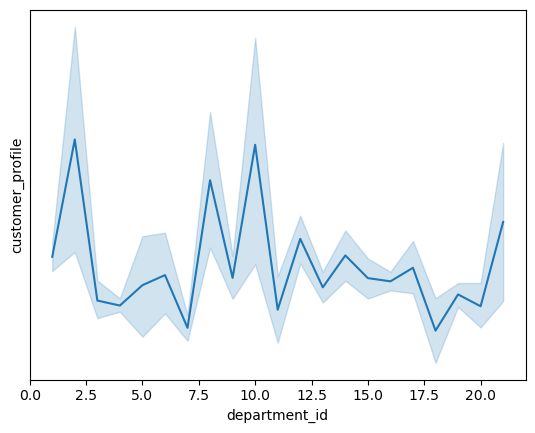

In [32]:
# Creating customer profile by department line chart

line_4 = sns.lineplot(data = a_4, x = 'department_id',y = 'customer_profile') 

In [34]:
# Exporting charts

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_customer_profile.png')) 

In [35]:
# Exporting charts

line_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_customer_profile.png')) 

### Exporting Notebook

In [36]:
ords_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Customer_profile.pkl')) 